In [2]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
# Q1:
df=pd.read_csv('../CSVs/1.questions.csv')
df.sort_values('ratings_count',ascending=False,inplace=True)
fig = px.bar(df, 
             x='name', 
             y='ratings_count', 
             title='Top 10 wines with ratings_count and ratings_average', 
             color='ratings_average',
             range_y=[10000, 160000],
             text=df['ratings_count'],
            
             
            ) 
fig.update_xaxes(tickfont=dict(size=10),title_text='')
fig.update_yaxes(tickfont=dict(size=10),title_text='')

fig.show()


In [9]:
# Q2
df=pd.read_csv('../CSVs/2.csv')
df.sort_values('wineries_count',ascending=False,inplace=True)

fig2a=px.pie(df,values='wines_per_user',names='country_name',title='Total wines  by country')
fig2a.show()
fig2b = px.bar(df, 
             x='country_name', 
             y='wineries_count', 
             title='Number of wineries per country', 
             color='wineries_count',
            #  range_y=[0, 160000],
             text=df['wineries_count'],
             opacity=0.8,
                color_continuous_scale=px.colors.diverging.Armyrose
            
            
            
             
            ) 
fig2b.update_xaxes(tickfont=dict(size=12),title_text='')
fig2b.update_yaxes(tickfont=dict(size=12),title_text='')
fig2b.update_layout(bargap=0.5)    

fig2b.show()

fig2c = px.scatter(df, x='wineries_count', y='toplists_count',
                  title='Scatter Plot: Wineries Count vs Toplists Count',
                  labels={'wineries_count': 'Number of Wineries',
                          'toplists_count': 'Number of Toplist Appearances'},
                  trendline='ols')  
fig2c.show()


fig2d = px.scatter(df, x='wines_per_user', y='toplists_count',
                 title='Scatter Plot: Total wines per country vs Toplists Count',
                 labels={'wines_per_user': 'Wines per User',
                         'toplists_count': 'Number of Toplist Appearances'},
                 color='country_name',  
                 size='wineries_count',  
                 hover_data=['country_name'],  
                 trendline='ols')  
fig2d.show()



In [11]:
df=pd.read_csv('../CSVs/3.csv')
fig = px.bar(df, 
             x='wineries_name', 
             y='ratings_count', 
             title='Top 3 best wineries in terms of ratings count', 
             color='ratings_average',
             range_y=[20000,50000],
             text=df['ratings_count'],
             color_continuous_scale=px.colors.sequential.Peach
             
             
            
             
            ) 
fig.update_xaxes(tickfont=dict(size=10),title_text='')
fig.update_yaxes(tickfont=dict(size=10),title_text='')

fig.show()


In [2]:
df_04 = pd.read_csv("04.csv")
keywords = ["coffee", "toast", "green apple", "cream", "citrus"]
df_04['keywords'] = df_04['keywords'].str.lower()
keywords = [kw.lower() for kw in keywords]
df_04['keywords'] = df_04['keywords'].str.split(', ')
df_04 = df_04.explode('keywords')
df_filtered = df_04[df_04['keywords'].isin(keywords) & (df_04['total_user_count'] >= 10)]
fig_keywords = px.bar(df_filtered, x='keywords', y='total_user_count', color='wine_name', 
                      title='Wines Related to Specific Keywords')
fig_keywords.show()

In [3]:
df_05 = pd.read_csv("05.csv")
top_grapes = df_05['grape'].value_counts().head(3).index.tolist()
best_wines = pd.DataFrame()
for grape in top_grapes:
    top_wines = df_05[df_05['grape'] == grape].nlargest(5, 'rating')
    best_wines = pd.concat([best_wines, top_wines])
best_wines = best_wines.reset_index(drop=True)
fig_best_wines = px.bar(best_wines, x='grape', y='rating', color='wine', 
                        title='Top 5 Best Rated Wines for the Top 3 Most Common Grapes',
                        hover_data=['wine', 'rating'])
fig_best_wines.show()

In [4]:
df_countries = pd.read_csv("06_part_01.csv")
df_vintages = pd.read_csv("06_part_02.csv")
country_avg_ratings = df_countries.groupby('country_name')['average_rating'].mean().reset_index()
country_avg_ratings = country_avg_ratings.sort_values(by='average_rating', ascending=False)
fig_country = px.bar(country_avg_ratings, x='country_name', y='average_rating', 
                     title='Average Wine Rating by Country (Regular Wines)',
                     labels={'average_rating': 'Average Rating', 'country_name': 'Country'},
                     text='average_rating')
fig_country.show()
vintage_country_avg_ratings = df_vintages.groupby('country_name')['average_rating'].mean().reset_index()
vintage_country_avg_ratings = vintage_country_avg_ratings.sort_values(by='average_rating', ascending=False)
fig_vintage_country = px.bar(vintage_country_avg_ratings, x='country_name', y='average_rating', 
                             title='Average Wine Rating by Country (Vintage Wines)',
                             labels={'average_rating': 'Average Rating', 'country_name': 'Country'},
                             text='average_rating')
fig_vintage_country.show()

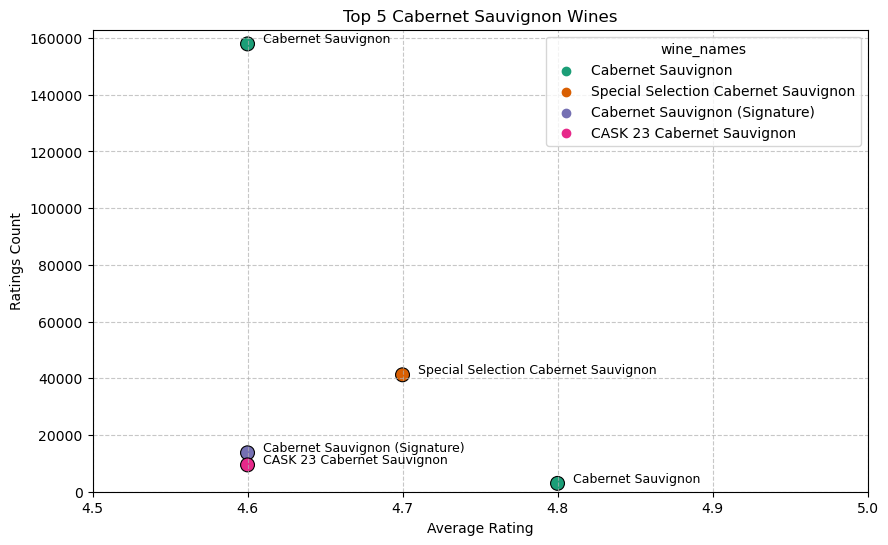

In [19]:
# Q7:
df=pd.read_csv('..//CSVs/7.csv')
data = {
    'wine_names': [
        'Cabernet Sauvignon',
        'Special Selection Cabernet Sauvignon',
        'Cabernet Sauvignon',
        'Cabernet Sauvignon (Signature)',
        'CASK 23 Cabernet Sauvignon'
    ],
    'ratings_average': [4.8, 4.7, 4.6, 4.6, 4.6],
    'ratings_count': [2941, 41236, 157944, 13730, 9464]
}


df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='ratings_average',
    y='ratings_count',
    hue='wine_names',
    data=df,
    palette='Dark2',
    s=100,  
    edgecolor='black'
)


for i in range(df.shape[0]):
    plt.text(
        df['ratings_average'][i] + 0.01,
        df['ratings_count'][i] + 500,
        df['wine_names'][i],
        fontsize=9
    )

plt.title('Top 5 Cabernet Sauvignon Wines')
plt.xlabel('Average Rating')
plt.ylabel('Ratings Count')
plt.xlim(4.5, 5.0)
plt.ylim(0, max(df['ratings_count']) + 5000)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [22]:
# Q8:extra   What is the distribution of wines across different taste profiles (e.g., sweetness, acidity, tannin), and how do these profiles correlate with the average rating of wines?
df=pd.read_csv('..//CSVs/8.csv')
correlation_matrix = (df[['avg_ratings_average', 'avg_acidity', 'avg_intensity', 'avg_sweetness', 'avg_tannin']].corr()).round(2)
fig = px.imshow(
    correlation_matrix,
    text_auto=True,
    color_continuous_scale='Viridis',
    title='Correlation Heatmap Between Taste Profiles and Ratings'
)


fig.update_layout(
    
    xaxis=dict(tickvals=list(range(len(correlation_matrix.columns))), ticktext=correlation_matrix.columns),
    yaxis=dict(tickvals=list(range(len(correlation_matrix.index))), ticktext=correlation_matrix.index),
    title_x=0.5
)


fig.show()


In [4]:
# QExtra:
df=pd.read_csv('../CSVs/01.1.csv')
import statsmodels.api as sm
import plotly.express as px

# Prepare the data
X = df['price_euros']
y = df['ratings_average']

# Add a constant to the independent variable matrix for the intercept
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Get the R-squared value
r_squared = model.rsquared

# Print the R-squared value
print(f'R-squared: {r_squared:.4f}')

# Plot the scatter plot with trendline
fig = px.scatter(
    df,
    x='price_euros',
    y='ratings_average',
    size='ratings_count',
    color='ratings_count',
    trendline='ols',
    labels={'price_euros': 'Price in Euros', 'ratings_average': 'Average Rating'},
    title=f'Price vs Rating Scatter Plot with Regression Line (R² = {r_squared:.4f})',
    color_continuous_scale=px.colors.sequential.Reds,
)

# Update layout
fig.update_layout(
    width=700,
    height=500,
    showlegend=False
)

# Show the plot
fig.show()



R-squared: 0.0076
